In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statistics as sts
from scipy.stats import ttest_ind_from_stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots
import scipy.stats

# Question 1

In [4]:
women_data=[5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]
sample_data=stats.ttest_1samp(women_data, popmean=7725) # Use of statistics
mean=sts.mean(women_data)
st = sts.stdev(women_data)
# st=np.std(women_data)
err= st/(len(women_data)**0.5)
t_stat=sample_data[0]
p_value=sample_data[1]
degree= len(women_data)-1 #(length of data -1)
print(f"Mean : {mean} \nStd : {st} \nSEM : {err} \nT-Test : {t_stat} \nP Value : {p_value} \nDegree of Freedom : {degree}")

# The two tailed 

Mean : 6753.636363636364 
Std : 1142.1232221373727 
SEM : 344.3631083801271 
T-Test : -2.8207540608310198 
P Value : 0.018137235176105812 
Degree of Freedom : 10


# Question 2

In [5]:

# # Data 1
mean1=74
std1=7.4
n1= 42

# Data 2
mean2=57
std2=7.1
n2=61

# tstat, pvalue = ttest_ind_from_stats(mean1, std1, n1, mean2,std2,n2)

nume=(mean1-mean2)
deno=(((std1**2)/n1) + ((std2**2)/n2))**0.5

tstat=nume/deno

num=((((std1)**2)/n1) + (((std2)**2)/n2))**2

den=((1/(n1-1))*((std1**2)/n1)**2) + ((1/(n2-1))*((std2**2)/n2)**2) 

df=num/den

pvalue=scipy.stats.t.sf(abs(tstat),df)


print(f"t-test : {tstat}\nPValue : {pvalue}")


# Checking

t-test : 11.647653131319812
PValue : 1.1579450814371136e-19


# Question 3

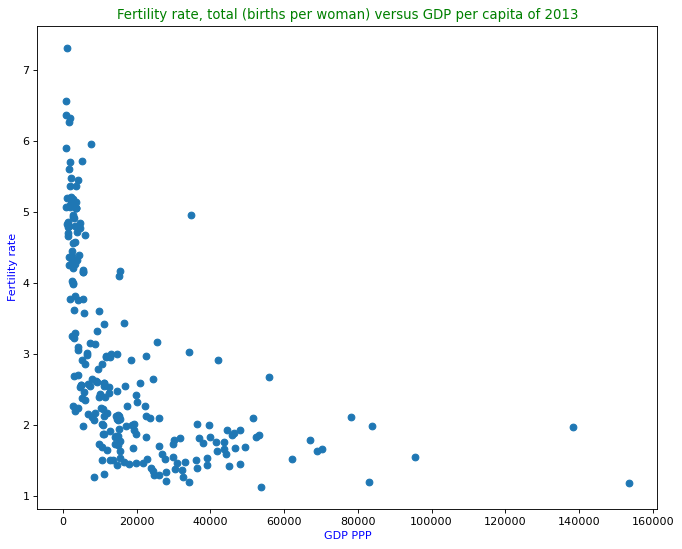

Correlation Coefficient: -0.5270269121272234


In [6]:
gdp=pd.read_excel('./inputs/gdp.xls', sheet_name=0, skiprows=3)
fertility=pd.read_excel('./inputs/births_per_woman.xls', sheet_name=0, skiprows=3)
gdp_data=gdp[["Country Code","2013"]]
fertility_data=fertility[["Country Code","2013"]]

cor=fertility_data[["2013"]].corrwith(gdp_data[["2013"]], axis = 0)

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(gdp_data["2013"], fertility_data["2013"])
plt.xlabel("GDP PPP",color='b')
plt.ylabel("Fertility rate",color='b')
plt.title("Fertility rate, total (births per woman) versus GDP per capita of 2013",color='g')
plt.show()

cor=cor.values.tolist()[0]
print(f"Correlation Coefficient: {cor}")

# Question 4

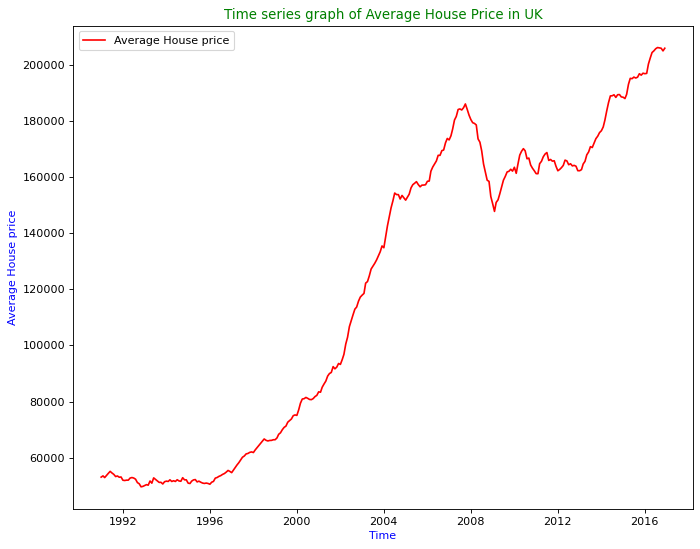

In [7]:
data=pd.read_excel('./inputs/uk_monthly.xls')
newList=data['Unnamed: 0']
data=data.drop(columns=['Unnamed: 0']) # reomoving this laballed-less column

# Finding the range of data requested 1991-2016
data['Time']=newList
data = data[(data['Time'] >= '1991-01-01') & (data['Time'] <= '2016-12-31')]
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(data[['Time']], data[['Average House Price']], label='Average House price', color='r')
plt.legend()
plt.xlabel("Time", color='b')
plt.ylabel("Average House price", color='b')
plt.title("Time series graph of Average House Price in UK", color='g')
plt.show()

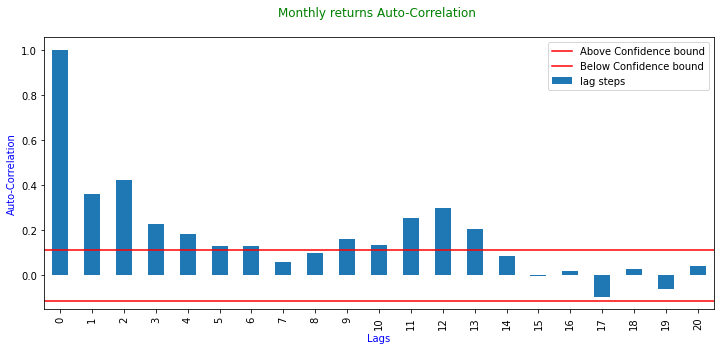

Annualized Return 1991-2016: 5.574271426114086%


In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf
import numpy as np


# calculating annualized return
my_returns=list()
daily_returns=data['Average House Price'].tolist()

r=0
for i in range(1,len(daily_returns)):
    r=((daily_returns[i]/daily_returns[i-1])-1)
    my_returns.append(r)

r=1
for i in my_returns:
    r=r*(1+i)

n=2016-1991
power=r**(1/n)
annualized_return=(power-1)*100
# Confidence
c1=1.96/(len(my_returns)**0.5)
c2=-1.96/(len(my_returns)**0.5)

plt.rc("figure", figsize=(12,5))

pd.Series(acf(my_returns,fft=False,nlags=20)).plot.bar(label='lag steps')
plt.title("Monthly returns Auto-Correlation \n", color='g')
plt.axhline(c1,color='r', label='Above Confidence bound')
plt.axhline(c2,color='r', label='Below Confidence bound')
plt.xlabel("Lags", color='b')
plt.ylabel("Auto-Correlation", color='b')
plt.legend()
plt.show()

print(f"Annualized Return 1991-2016: {annualized_return}%")

# Question 5

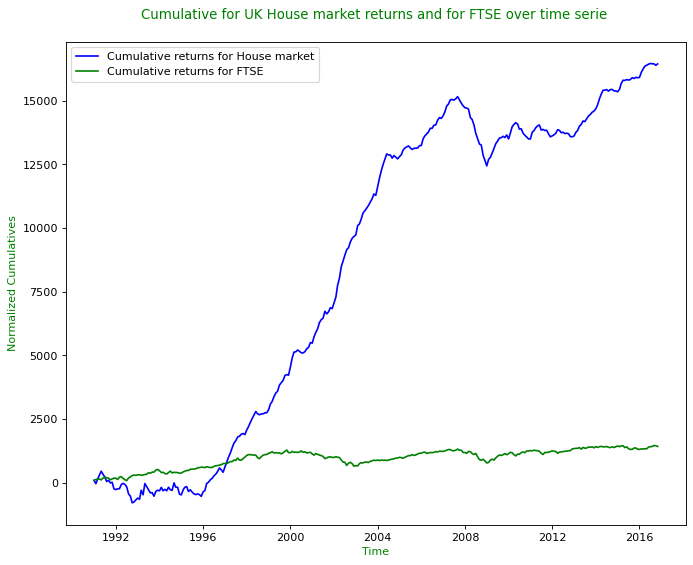

Annualized Returns : 4.645100329517793%


In [11]:
# processing data from 4
# find cumulative returs
cumulative_returns1=list()
s=0
for i in my_returns:
    s+=i
    cumulative_returns1.append(s)

# FTSE
ftse_data=pd.read_csv('./inputs/FTSE100.csv')
ftse_data_in_range=ftse_data[(ftse_data['Date'] <= '2016-31-12') & (ftse_data['Date'] >= '1991-01-01')]

adjs=ftse_data['Adj Close'].tolist()
dates=ftse_data['Date'].tolist()

# changing the order of dates and its data because they are originately ordered descendingly.
n=len(adjs)-1
adjs1=[]
dates1=[]
while n>=0 :
    adjs1.append(adjs[n])
    dates1.append(dates[n])
    n-=1
adjs=adjs1
dates=dates1
ftse_simple=pd.DataFrame()
ftse_simple['Time']=dates
ftse_simple['Adj']=adjs
ftse_simple

# find the dail returns
my_returns5=list()
daily_returns5=ftse_simple['Adj'].tolist()

r=0
for i in range(1,len(daily_returns5)):
    r=((daily_returns5[i]/daily_returns5[i-1])-1)
    my_returns5.append(r)


r=1
cumulative_returns2=[]
s=0
for i in my_returns5:
    r=r*(1+i)
    s+=i
    cumulative_returns2.append(s)

arr1=[]
arr2=[]

for i in cumulative_returns1:
    arr1.append((i*100)/cumulative_returns1[0])
    
for i in cumulative_returns2:
    arr2.append((i*100)/cumulative_returns2[0])

# np_arr1=np_arr1/np_arr1[0]

n=2016-1991
power=r**(1/n)
annualized_return5=(power-1)*100

# Time to plot
plt.figure(figsize=(10, 8), dpi=80)

plt.plot(data['Time'][:-1], arr1, label='Cumulative returns for House market', color='b')
plt.plot(data['Time'][:-1], arr2, label='Cumulative returns for FTSE', color='g')
plt.xlabel("Time", color='g')
plt.ylabel("Normalized Cumulatives", color='g')
plt.title("Cumulative for UK House market returns and for FTSE over time serie \n", color= 'g')
plt.legend()
plt.show()

# ftse_data_in_range
print(f"Annualized Returns : {annualized_return5}%")
